<a href="https://colab.research.google.com/github/nishantkapps/aiml-projects/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Great Learning / Deakin (MDS) Project Submission**
>**Neural Networks (NN) Project**<br>
>*Goal : Demonstrate the ability to build a neural network model to classify signal data*<br>
>*Domain : Electronics and Telecommunication* <br>
>*Developer : Nishant Killedar*
<hr>

> **CONTEXT:** A communications equipment manufacturing company has a product which is responsible for emitting informative signals.
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various
parameters.

<hr>

> **PROJECT OBJECTIVE**: Build a classifier which can use the given parameters to determine the signal strength or quality..

<hr>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<hr>

**Section 1 : Data import and Understanding [10 Marks]**
<li>A. Read the ‘Signals.csv’ as DataFrame and import required libraries. [2 Marks]
<li>B. Check for missing values and print percentage for each attribute. [2 Marks]
<li>C. Check for presence of duplicate records in the dataset and impute with appropriate method. [2 Marks]
<li>D. Visualise distribution of the target variable. [2 Marks]
<li>E. Share insights from the initial data analysis (at least 2). [2 Marks]

<hr>

In [2]:
data = pd.read_csv('/content/drive/MyDrive/datasets/nn/NN Project Data - Signal.csv')

In [18]:
nulls = (data.isnull().sum() / data.shape[0] * 100).round(2)
print("{0}".format(nulls))

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


In [19]:
zeros = (data.eq(0).sum() / data.shape[0] * 100).round(2)
print("{0}".format(zeros))

Parameter 1        0.00
Parameter 2        0.00
Parameter 3        8.26
Parameter 4        0.00
Parameter 5        0.00
Parameter 6        0.00
Parameter 7        0.00
Parameter 8        0.00
Parameter 9        0.00
Parameter 10       0.00
Parameter 11       0.00
Signal_Strength    0.00
dtype: float64


<hr>
The dataset has missing values (zero values) for Parameter 3  <br> The above table shows % of missing data for each attribute
<hr>

In [24]:
duplicateRows = data[data.duplicated()]
duplicateRows

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [25]:
datacln = data.drop_duplicates(subset=None, keep='first', inplace=False)

In [26]:
datacln[datacln.duplicated()]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength


<hr>
The dataset has 240 duplicate rows <br> Using drop_duplicates to remove duplicate rows from the dataset<br> We will check for null values again after dropping duplicate rows
<hr>

In [27]:
zeros = (datacln.eq(0).sum() / datacln.shape[0] * 100).round(2)
print("{0}".format(zeros))

Parameter 1        0.00
Parameter 2        0.00
Parameter 3        8.68
Parameter 4        0.00
Parameter 5        0.00
Parameter 6        0.00
Parameter 7        0.00
Parameter 8        0.00
Parameter 9        0.00
Parameter 10       0.00
Parameter 11       0.00
Signal_Strength    0.00
dtype: float64


In [36]:
datacln = datacln.replace(0, np.NaN)

<Axes: >

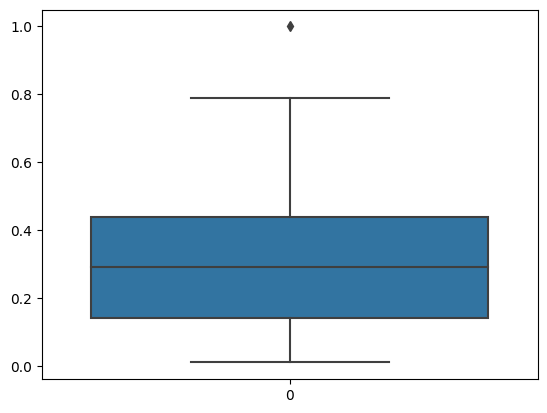

In [35]:
sns.boxplot(datacln['Parameter 3'])

<hr>

As can be seen from the box plot, we do not have many outliers
From this, we can safely use the mean or median as a value for all zero values

<hr>

In [37]:
datacln['Parameter 3'] = datacln['Parameter 3'].fillna(datacln['Parameter 3'].median())

In [38]:
datacln['Parameter 3'].isnull().sum()

0

<hr>
We have removed all the duplicate rows and imputed missing values with the median
<hr>

<Axes: >

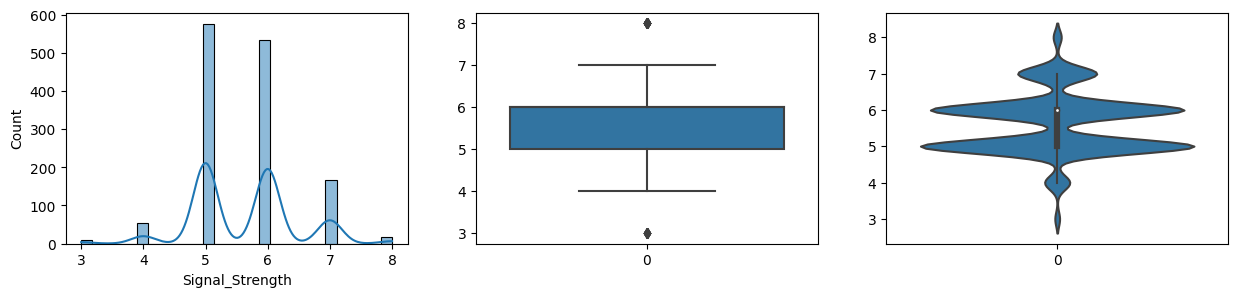

In [63]:
fig, sub = plt.subplots(1,3, figsize=(15,3))
sns.histplot(datacln['Signal_Strength'], kde=True, ax=sub[0])
sns.boxplot(datacln['Signal_Strength'], ax=sub[1])
sns.violinplot(datacln['Signal_Strength'], ax=sub[2])

<hr>
<li>There are very few data points with Signal Strength 3 or 8. Most rows have signal strength of 5/6
<li> Using this model to train data may not predict lower signal strength correctly
<li>We will need to use sampling techniques or data augmentation to get more data for lower signal so we can effectively predict

<hr>